# T-SNE Analysis (t-Distributed Stochastic Neighbor Embedding) - LAB

## Introduction

In the realm of machine learning, data visualization, and data mining, dimensionality reduction plays a pivotal role. Among the various techniques available, t-Distributed Stochastic Neighbor Embedding, commonly known as t-SNE, stands out as a powerful tool for uncovering intricate patterns within high-dimensional datasets. We will take a look at the concepts underlying t-SNE and then apply this technique to a synthetic, boutique data set related to visualizing the hypothetical operations of an Intrusion Detection System.

## What is t-SNE?

t-SNE is a nonlinear dimensionality reduction technique that excels in preserving the structure of the data. It was introduced by [Laurens van der Maaten and Geoffrey Hinton in 2008](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf). Unlike linear techniques such as PCA, t-SNE focuses on mapping data points to a lower-dimensional space while preserving pairwise similarities.

## How Does t-SNE Work?

t-SNE minimizes the divergence between two probability distributions: a distribution that measures pairwise similarities of the data points and a distribution in the lower-dimensional space. It constructs these distributions iteratively, making the data points in the low-dimensional space match their high-dimensional counterparts as closely as possible.

The t-SNE algorithm models the probability distribution of neighbors around each point. Here, the term neighbors refers to the set of points which are closest to each point. In the original, high-dimensional space this is modeled as a Gaussian distribution. In the 2-dimensional output space this is modeled as a t-distribution. The goal of the procedure is to find a mapping onto the 2-dimensional space that minimizes the differences between these two distributions over all points.

Because the distributions are distance based, all the data must be numeric. You should convert categorical variables to numeric ones by binary encoding or a similar method. It is also often useful to normalize the data, so each variable is on the same scale. This avoids variables with a larger numeric range dominating the analysis.

Note that t-SNE only works with the data it is given. It does not produce a model that you can then apply to new data.


## t-SNE vs PCA & Other “clustering” methods

If you’re familiar with Principal Components Analysis (PCA), then like me, you’re probably wondering the difference between PCA and t-SNE. The first thing to note is that PCA was developed in 1933 while t-SNE was developed in 2008. A lot has changed in the world of data science since 1933 mainly in the realm of compute and size of data. Second, PCA is a linear dimension reduction technique that seeks to maximize variance and preserves large pairwise distances. In other words, things that are different end up far apart. This can lead to poor visualization especially when dealing with non-linear manifold structures. Think of a manifold structure as any geometric shape like a cylinder, ball, curve, etc.

t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance. Laurens illustrates the PCA and t-SNE approach pretty well using the Swiss Roll dataset in Figure 1 [1]. You can see that due to the non-linearity of this toy dataset (manifold) and preserving large distances that PCA would incorrectly preserve the structure of the data.

To the same end, t-SNE in comparison to the other clustering methods intends to support high dimension reduction into a low number of dimensions (2d or 3d) facilitating and enhancing EDA and interpretation of the original hyper-dimensional space.  For example, it is not feasible to inspect the pair-plots of all combinations of features and consider how each may be mapped to a latent construct, homogeneous group, or cluster.  Like the other clustering methods, t-SNE permits this dimension reduction and prescribes each observation to a focused and tightly coupled group based on maximizing the similarities between “like” cases while sacrificing global distances between clusters; this approach, in addition to being a non-linear approach which is effective for significantly skewed frequency distributions, gives some creance for establishing highly reliable group memberships. In fact, t-SNE achieve optimal cluster separation in 2-dimensions.



## Parameters and hyper-turning t-SNE Considerations

## Perplexity and Iterations

One crucial parameter in t-SNE is “perplexity,” which roughly represents the balance between preserving local and global structures. Choosing an appropriate perplexity value is a key part of using t-SNE effectively. Additionally, t-SNE often requires some experimentation with the number of iterations and learning rates to achieve optimal results.

**Perplexity** defines the expected number of neighbours within a cluster and the distances are scaled relative to perplexity neighbours. 

<img src="../images/tsne-perplexity01.png" style="height:250px;width:400px" />

The main parameter controlling the fitting is called perplexity. Perplexity is roughly equivalent to the number of nearest neighbors considered when matching the original and fitted distributions for each point. A low perplexity means we care about local scale and focus on the closest other points. High perplexity takes more of a "big picture" approach.

As another example we can imagine how the perplexity parameter affects the robustness of the derived clusters.

<img src="../images/tsne-perplexity02.png" />

The “experimental design” is to optimize the perplexity parameter to achieve a minimal within-cluster distances among the observations and greatest separation between clusters.

Here’s another example of how the perplexity setting matters:

<img src="../images/tsne-projection02.png" />

Above, we can see that there may well be natural clusters in the original data, and they may not be reidentified based on the perplexity setting.  

t-SNE operates by first rrandomly scattering all points within the space (normally 2D) and them as a simulation
•	Attempt to make the point distances match the distance matrix
•	Shuffle points based on how well they match
•	Stop after fixed number of iterations, or
•	Stop after distances have converged

<img src="../images/tsne-projection01.png" />

Some considerations to be aware of is unlike with using PCA, X and Y, and the distances do not have an interpretative meaning given the original space is recast or projected into a new 2d space using non-linear transformations. While distant proximity (between cluster distances) isn’t very interesting, close proximity is highly informative and informs us significantly about “likeness”.

## So, why use t-SNE?

When setting up a predictive model, the first step should always be to understand the data. Although scanning raw data and calculating basic statistics can lead to some insights, nothing beats a chart. However, fitting multiple dimensions of data into a simple chart is always a challenge (dimensionality reduction). This is where t-SNE (or, t-distributed stochastic neighbor embedding for long) comes in.




## The synthetic data
The hypothetical data involves a collection of observations indicating the number of various cyber attacks occurring on an organization's network and systems. These data originate from different servers constituting our organization's Intrusion Detection System (IDS). The observations are aggregate counts for several indicator variables and the best estimate of the potential type of detected intrusion as determined by the internal IDS algorithms.

The data contained in the miri-IDS01.csv file represents a collection of observations indicating the number of various cyber attacks occurring on an organization's network and systems. The data are defined as follows:

* InPKTsec = Number (in 1000) of incoming UDP/TCP packets per second
* portProbessec = Number (in 1000) of port probes per second
* NumSrcIPsec = Number (in 1000) of different source IP Address per second
* Loginssec = Number (in 1000) of unauthorized login attempts per second
* IntrusionType = Known Intrusion Type Attempt (Port Scan, Denial of Service, Unauthorized Access)

## The Task
Our task is to use take these 4 independent features and to reduce into 2-dimensional space using t-SNE to visualize the results as they indicate how they cluster relative to the Intrusion Type outcome or target.  This exploratory analysis will help to enhance confidence that the IDS system is validly and reliability operating.


### Load Libraries

In [1]:
%matplotlib inline
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import HTML
#from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


### Read CSV data file

In [2]:
ids_df = pd.read_csv("miri-IDS01.csv")

### Construct lists of features, target, labels

In [3]:
features = ['InPKTsec','portProbessec','NumSrcIPsec','Loginssec']
target = 'IntrusionTypeCODE'
targetlabels = ['Port Scan','Denial of Service Attempt','Unauthorized Access Attempt']

### Converting Intrusion Type description to numeric

In [4]:
ids_df['IntrusionTypeCODE']=ids_df['IntrusionType']
ids_df['IntrusionTypeCODE'].replace({'Port Scan':1, 'Denial of Service Attempt':2, 'Unauthorized Access Attempt':3}, inplace=True)

### Look at the dataframe information and data

In [5]:
ids_df.info()
ids_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InPKTsec           150 non-null    float64
 1   portProbessec      150 non-null    float64
 2   NumSrcIPsec        150 non-null    float64
 3   Loginssec          150 non-null    float64
 4   IntrusionType      150 non-null    object 
 5   IntrusionTypeCODE  150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,InPKTsec,portProbessec,NumSrcIPsec,Loginssec,IntrusionType,IntrusionTypeCODE
0,5.1,3.5,1.4,0.2,Port Scan,1
1,4.9,3.0,1.4,0.2,Port Scan,1
2,4.7,3.2,1.3,0.2,Port Scan,1
3,4.6,3.1,1.5,0.2,Port Scan,1
4,5.0,3.6,1.4,0.2,Port Scan,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Unauthorized Access Attempt,3
146,6.3,2.5,5.0,1.9,Unauthorized Access Attempt,3
147,6.5,3.0,5.2,2.0,Unauthorized Access Attempt,3
148,6.2,3.4,5.4,2.3,Unauthorized Access Attempt,3


### Define a function for ploting 2d Scatterplot for the t-SNE results

In [6]:
def plot_ids_2d(x, y, title, xlabel="X-DIM", ylabel="YDIM"):
    sns.set()
    sns.set(rc={"figure.figsize": (10, 8)})
    PALETTE = sns.color_palette('deep', n_colors=3)
    CMAP = ListedColormap(PALETTE.as_hex())
    sns.set_style("darkgrid")
    
    scatter=plt.scatter(x, y,
        c=ids_df['IntrusionTypeCODE'],
        cmap=CMAP,
        s=300,
        alpha=.6)
    
    plt.legend(handles=scatter.legend_elements()[0], labels=targetlabels,loc='upper left',scatterpoints=1,numpoints=1)
    plt.title(title, fontsize=20, y=1.03)
    
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

### Visualize the feature distributions and relationships using a pair-plot

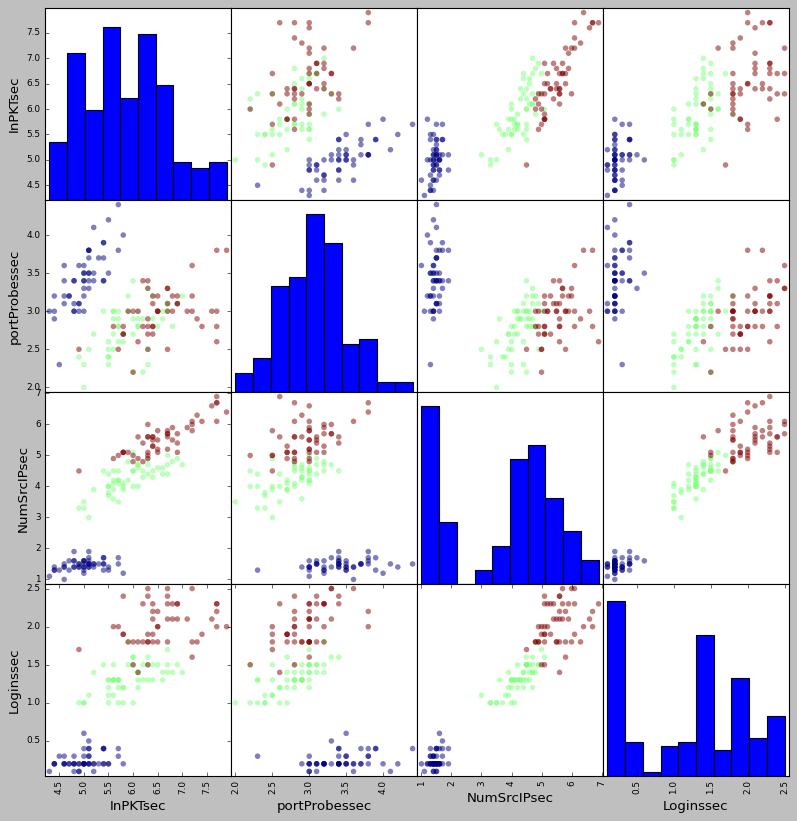

In [7]:
#use the class plot style
plt.style.use('classic')

#add a custom title and legend
display(HTML('<div style=text-align:center><br/><br/><span style=font-size:33px;font-weight:bold>Pair-plot of IDS Features</span><br/><span style=font-size:24px;color:darkblue>&#x2022;</span><span style=color:darkblue>'+targetlabels[0]+'</span>'+'&nbsp;&nbsp;<span style=font-size:24px;color:darkred>&#x2022;</span><span style=color:darkred>'+targetlabels[1]+'</span>'+'&nbsp;&nbsp;<span style=font-size:24px;color:green>&#x2022;</span><span style=color:green>'+targetlabels[2]+'</span></div>'))

#generate pair-plot/scatter-matrix
scatter_matrix(ids_df[features],figsize = [12,12],c=ids_df['IntrusionTypeCODE'],s=100)
plt.show() 

## Perform T-SNE analysis & Plot the 2-D T-SNE reduction

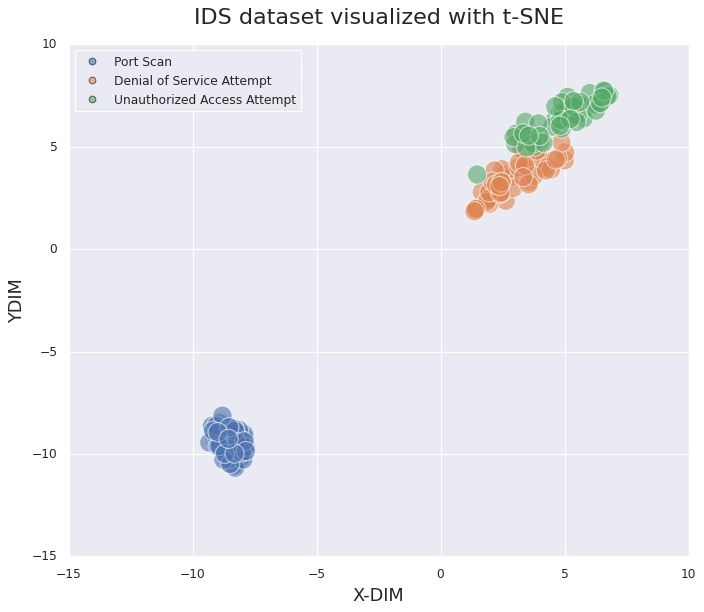

In [8]:
#experiment with the perplexity and n_iter parameters
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000, random_state=11) #<<-----n_components specifies number of final dimensions

points = tsne.fit_transform(ids_df[features]) #<<------only fit the 4 features

plot_ids_2d(
    x = points[:, 0],
    y = points[:, 1],
    title = 'IDS dataset visualized with t-SNE')

### What's the intrepetation?

We can see that we have tight clustering for each of the 3 target categories.  It is also apparent that the original features that relate to the "Port Scan" target are very different from the features related to the Denial of Service Attempt and Unauthorized Access Attempt targets.  

This distinction between the 3 target clusters is evident in the original data based on the pair-plots, but not as dramatic.  The next step would be to drill into the details of the data and see how the different features impact the target intrusion type.

### Conclusion

By using a small data set with a only a few features we can examing more easily the relationships among them and the dimension reduction outcomes using the t-SNE method.  This strategy can be easily reproduced with hyper-dimensional data.